In [1]:
# install dependencies
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.3.1)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.4.2)
Requirement already up-to-date: cython in /usr/local/lib/python3.6/dist-packages (0.29.14)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-qzbi4w10
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-qzbi4w10
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-zeo_c4nw
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-zeo_c4nw
     |████████████████████████████████| 266kB 9.2MB/s 
  Created wheel for fvcore: filename=fvcore-0.1-cp36-none-any.whl size=47493 sha256=90952fce7251d17f294c92e3dc58fbd4b64f7293261fb1c03926c51d98e51890
  Stored in directory: /tmp/pip-ephem-wheel-cache-679vpdev/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel f

'1.3.1'

In [2]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 1345, done.
remote: Total 1345 (delta 0), reused 0 (delta 0), pack-reused 1345
Receiving objects: 100% (1345/1345), 1.60 MiB | 3.46 MiB/s, done.
Resolving deltas: 100% (809/809), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 2.1MB 6.1MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
  Running setup.py develop for detectron2


In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [2]:
cfg = get_cfg()
cfg.merge_from_file("./detectron2_repo/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 10
cfg.MODEL.WEIGHTS = "model_final_1.pth"
predictor = DefaultPredictor(cfg)

WARNING [11/20 10:59:49 d2.config.compat]: Config './detectron2_repo/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


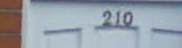

In [3]:
im = cv2.imread("2.png")
cv2_imshow(im)

In [6]:
%%timeit
outputs = predictor(im)

10 loops, best of 3: 65.5 ms per loop


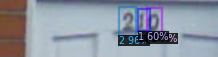

In [5]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get("SVHN").set(thing_classes=["0","1","2","3","4","5","6","7","8","9"]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])